In [145]:
# Import and init h2o lib. Running on java
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
h2o.init()
col_types_best = {
 'chain_name': 'enum',
 'mall_name': 'enum',
 'revenue': 'numeric',
 #'lv1': 'enum',
 'lv2': 'enum',
 'lv3': 'enum'
 #'total_nbr_people': 'int',
 #'nbr_people_per_store_in_grunnkrets': 'numeric',
 #'counts_gr_lv2': 'numeric',
 #'counts_municipality_lv2': 'numeric',
 #'busstops_within_50m': 'numeric',
 #'busstops_within_100m': 'numeric',
 #'busstops_within_400m': 'numeric',
 #'busstops_within_800m': 'numeric',
 #'busstops_within_1500m': 'numeric',
 #'num_stores_within_100m_and_same_lvl2': 'numeric',
 #'num_stores_within_500m_and_same_lvl2': 'numeric',
 #'num_stores_within_1km_and_same_lvl2': 'numeric',
 #'num_stores_within_5km_and_same_lvl2': 'numeric',
 #'num_stores_within_10km_and_same_lvl2': 'numeric',
 #'num_stores_within_20km_and_same_lvl2': 'numeric',
 #'closest_competitor_lv2': 'numeric',
 #'mean_revenue_lv3' : 'numeric',
 #'mean_revenue_lv2' : 'numeric',
 #'median_revenue_lv3' : 'numeric',
 #'median_revenue_lv2' : 'numeric',
 #'mean_revenue_chain' : 'numeric',
 #'median_revenue_lv4' : 'numeric',
 #'mean_revenue_lv4' : 'numeric'
 #'num_stores_within_100m_and_same_lvl3': 'numeric',
 #'num_stores_within_500m_and_same_lvl3': 'numeric',
 #'num_stores_within_1km_and_same_lvl3': 'numeric',
 #'num_stores_within_5km_and_same_lvl3': 'numeric',
 #'num_stores_within_10km_and_same_lvl3': 'numeric',
 #'num_stores_within_20km_and_same_lvl3': 'numeric',
 #'closest_competitor_lv3': 'numeric',
 #'municipality_size_group': 'enum',
 #'mean_revenue_for_municipality_size_group': 'numeric',
 #'median_revenue_for_municipality_size_group': 'numeric',
 #'st_dev_of_revenue_for_municipality_size_group': 'numeric',
 #'municipality_rev_group_lv2': 'numeric',
 #'mean_revenue_for_municipality_rev_group_lv2': 'numeric'
 }

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_paaske_8ymiug
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,628 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [146]:
# Reading csv to h2o dataframe 
col_types1 = {
'chain_name': 'enum',
'mall_name': 'enum',
'sales_channel_name': 'enum',
'revenue': 'numeric',
'lv1': 'enum',
'lv2': 'enum',
'lv3': 'enum',
'lv4': 'enum',
'municipality_name': 'enum'
#'municipality_size_group': 'enum'
#'municipality_rev_group': 'enum'
}


train_data = pd.read_csv('feature_data/training_set_dropped_best.csv')
test_data = pd.read_csv('feature_data/testing_set_dropped_best.csv')

# Save store ids, then remove this column
store_ids = test_data['store_id'].to_numpy()
ids = pd.DataFrame(store_ids)
ids.rename(columns={0 :'id'}, inplace=True)

train_data = train_data.drop('store_id', axis=1)
test_data = test_data.drop('store_id', axis=1)


train_data.to_csv('feature_data/training_set_dropped_no_id.csv', index=False)
test_data.to_csv('feature_data/testing_set_dropped_no_id.csv', index=False)

train_data = h2o.import_file('feature_data/training_set_dropped_no_id.csv', col_types=col_types_best)
del col_types_best['revenue']
test_data = h2o.import_file('feature_data/testing_set_dropped_no_id.csv', col_types=col_types_best)

train_data.types





Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


{'chain_name': 'enum',
 'mall_name': 'enum',
 'revenue': 'real',
 'lv2': 'enum',
 'lv3': 'enum',
 'lv4': 'enum',
 'total_nbr_people': 'real',
 'nbr_people_per_store_in_grunnkrets': 'real',
 'busstops_within_1500m': 'real',
 'busstops_within_3000m': 'real',
 'busstops_within_6000m': 'real',
 'num_stores_within_500m_and_same_lvl2': 'real',
 'num_stores_within_20km_and_same_lvl2': 'real',
 'closest_competitor_lv2': 'real',
 'num_stores_within_20km_and_same_lvl3': 'real',
 'closest_competitor_lv3': 'real',
 'num_stores_within_100m_and_same_lvl4': 'real',
 'num_stores_within_500m_and_same_lvl4': 'real',
 'num_stores_within_1km_and_same_lvl4': 'real',
 'num_stores_within_5km_and_same_lvl4': 'real',
 'num_stores_within_10km_and_same_lvl4': 'real',
 'num_stores_within_20km_and_same_lvl4': 'real',
 'closest_competitor_lv4': 'real',
 'municipality_rev_group': 'enum',
 'mean_revenue_for_municipality_rev_group': 'real',
 'median_revenue_for_municipality_rev_group': 'real',
 'mean_revenue_lv2': 're

In [147]:
# Removing labels from train set
y = "revenue"
x = train_data.columns
x.remove(y)
test_data

chain_name,mall_name,lv2,lv3,lv4,total_nbr_people,nbr_people_per_store_in_grunnkrets,busstops_within_1500m,busstops_within_3000m,busstops_within_6000m,num_stores_within_500m_and_same_lvl2,num_stores_within_20km_and_same_lvl2,closest_competitor_lv2,num_stores_within_20km_and_same_lvl3,closest_competitor_lv3,num_stores_within_100m_and_same_lvl4,num_stores_within_500m_and_same_lvl4,num_stores_within_1km_and_same_lvl4,num_stores_within_5km_and_same_lvl4,num_stores_within_10km_and_same_lvl4,num_stores_within_20km_and_same_lvl4,closest_competitor_lv4,municipality_rev_group,mean_revenue_for_municipality_rev_group,median_revenue_for_municipality_rev_group,mean_revenue_lv2,mean_revenue_lv3,median_revenue_lv2,median_revenue_lv3,mean_revenue_chain,median_revenue_lv4,mean_revenue_lv4
No chain,No mall,0.741937,1.1.1,1.1.1.0,6.86797,6.86797,4.70953,5.76519,6.83626,2.63906,7.58579,0.0321771,3.91202,0.861841,0.693147,0.693147,0.693147,3.3673,3.63759,3.91202,0.861841,rev_1.2_to_2,0.953556,0.911095,0.918386,1.13022,0.913133,1.11264,0.816999,1.11264,1.13022
BURGER KING,Stovner Senter,0.741937,1.1.1,1.1.1.0,7.79235,4.85531,3.80666,5.0876,6.17794,2.30259,7.54697,0.000516631,3.82864,1.29872,0.693147,0.693147,0.693147,2.19722,2.94444,3.82864,1.29872,rev_1.2_to_2,0.953556,0.911095,0.918386,1.13022,0.913133,1.11264,1.04032,1.11264,1.13022
VULKAN BURGERBAR,No mall,0.741937,1.1.1,1.1.1.0,8.50147,6.20071,4.77068,6.01127,6.87316,1.79176,7.58477,0.30168,3.89182,0.823647,0.693147,0.693147,0.693147,3.43399,3.63759,3.89182,0.823647,rev_1.2_to_2,0.953556,0.911095,0.918386,1.13022,0.913133,1.11264,1.48097,1.11264,1.13022
BURGER KING,No mall,0.741937,1.1.1,1.1.1.0,6.93828,5.33272,4.02535,5.20949,6.13556,2.07944,7.5984,0.0432923,3.93183,1.00078,0.693147,0.693147,0.693147,1.09861,3.46574,3.93183,1.00078,rev_1.2_to_2,0.953556,0.911095,0.918386,1.13022,0.913133,1.11264,1.04032,1.11264,1.13022
No chain,No mall,0.741937,1.1.1,1.1.1.0,7.36771,4.33573,4.35671,5.66988,6.7334,4.04305,7.6004,0.0603135,3.89182,0.0843221,1.09861,1.38629,1.38629,3.3322,3.55535,3.89182,0.0843221,rev_1.2_to_2,0.953556,0.911095,0.918386,1.13022,0.913133,1.11264,0.816999,1.11264,1.13022
No chain,No mall,0.741937,1.1.1,1.1.1.0,4.77912,1.04512,4.82831,5.86079,6.80683,5.39363,7.5994,0.0562585,3.91202,0.166935,0.693147,1.79176,2.63906,3.29584,3.55535,3.91202,0.166935,rev_1.2_to_2,0.953556,0.911095,0.918386,1.13022,0.913133,1.11264,0.816999,1.11264,1.13022
No chain,No mall,0.741937,1.1.1,1.1.1.0,7.31788,4.84024,4.23411,5.64191,6.76619,1.60944,7.6039,0.0413104,3.93183,0.632861,0.693147,0.693147,1.09861,3.21888,3.55535,3.93183,0.632861,rev_1.2_to_2,0.953556,0.911095,0.918386,1.13022,0.913133,1.11264,0.816999,1.11264,1.13022
No chain,No mall,0.741937,1.1.2,1.1.2.0,7.19369,5.11949,4.85981,5.80513,6.76619,4.45435,7.6014,0.0168698,5.01064,0.107576,0.693147,2.30259,3.2581,4.61512,4.81218,5.01064,0.107576,rev_1.2_to_2,0.953556,0.911095,0.918386,0.951516,0.913133,0.90762,0.816999,0.90762,0.951516
No chain,No mall,0.741937,1.1.2,1.1.2.0,6.49979,4.56286,4.43082,5.57215,6.70319,4.17439,7.6039,0.0295874,5.00395,0.128105,1.09861,2.07944,3.04452,4.59512,4.81218,5.00395,0.128105,rev_1.2_to_2,0.953556,0.911095,0.918386,0.951516,0.913133,0.90762,0.816999,0.90762,0.951516
No chain,No mall,0.741937,1.1.2,1.1.2.0,8.50147,6.20071,4.7185,5.99146,6.86066,2.30259,7.58426,0.290387,4.99721,0.33885,0.693147,1.09861,1.38629,4.65396,4.79579,4.99721,0.33885,rev_1.2_to_2,0.953556,0.911095,0.918386,0.951516,0.913133,0.90762,0.816999,0.90762,0.951516


In [148]:
# Running fit/training on train set with cross validation n=5
aml = H2OAutoML(max_models = 30, seed = 2, stopping_metric = "RMSE")
aml.train(x = x, y = y, training_frame = train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.4989982,0.0118245,0.5081524,0.505546,0.4973173,0.4791136,0.5048619
mean_residual_deviance,0.4295880,0.0214388,0.4492564,0.4422990,0.4221803,0.3956150,0.4385894
mse,0.4295880,0.0214388,0.4492564,0.4422990,0.4221803,0.3956150,0.4385894
null_deviance,2476.749,97.58557,2593.3472,2497.2578,2507.8208,2459.624,2325.695
r2,0.5673860,0.0183742,0.5579032,0.5554884,0.5723689,0.5974903,0.5536795
residual_deviance,1070.9553,60.953754,1146.5024,1108.8435,1072.3381,989.8287,1037.264
rmse,0.6552632,0.0165162,0.670266,0.6650556,0.6497540,0.6289793,0.6622609
rmsle,0.2758963,0.0051898,0.2805989,0.2717167,0.2770383,0.2693426,0.2807850


In [149]:
lb = aml.leaderboard

In [150]:
# Showing best perforimg models
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_15_20221113_114922,0.655414,0.429568,0.498728,0.275833,0.429568
StackedEnsemble_BestOfFamily_1_AutoML_15_20221113_114922,0.656978,0.43162,0.500769,0.276472,0.43162
DeepLearning_grid_1_AutoML_15_20221113_114922_model_2,0.661695,0.437841,0.505422,0.278354,0.437841
XGBoost_grid_1_AutoML_15_20221113_114922_model_3,0.662884,0.439416,0.506245,0.278548,0.439416
XGBoost_grid_1_AutoML_15_20221113_114922_model_5,0.66323,0.439874,0.505949,0.27884,0.439874
XGBoost_grid_1_AutoML_15_20221113_114922_model_1,0.663383,0.440077,0.50565,0.278679,0.440077
DeepLearning_grid_2_AutoML_15_20221113_114922_model_2,0.663628,0.440402,0.509211,0.278838,0.440402
GLM_1_AutoML_15_20221113_114922,0.664007,0.440905,0.508217,0.278928,0.440905
XGBoost_3_AutoML_15_20221113_114922,0.666124,0.443722,0.508263,0.279882,0.443722
DeepLearning_1_AutoML_15_20221113_114922,0.666846,0.444683,0.510845,0.281084,0.444683


In [151]:
preds = aml.predict(test_data)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/paaske/.local/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'chain_name' has levels not trained on: ["24 7 TRENINGSSENTER", "ACE SHOPS", "AVANCIA SPORT", "BADEMILJØ", "BADERINGEN", "BAROKK FRISØR", "BERTONI NORWAY", "BIRK SPORT", "BLUE ENERGY", "DESINESS", ...25 not listed..., "SALT OG PEPPER HØNEFOSS", "SKOGSTAD DETALJ", "SKY FITNESS", "TIGER OF SWEDEN", "TIPPY", "VARMEFAG INVEST", "VITA EXCLUSIVE", "YOGIS", "ZAVANNA", "ZAXIZ FRISØR"]
  warnings.warn(w)
/home/paaske/.local/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'mall_name' has levels not trained on: ["Aamodt Senter", "Bardufoss Torgsenter", "Bellevuesenteret", "Borgeåsen Senter", "CC Mart'n", "Combisenteret Fiskå", "Coop Mega Hønefoss", "Coop Mega Øvre Årdal", "Cuben Kjøpesenter", "De Syv Søstre kjøpesenter", ...39 not listed..., "Strøget", "Sundt Motehus", "Svelvik Nærsenter", "Tebo Senter", "Trekanten Senter Kristiansand", "Tårnhuset", "Va

In [152]:
#print variable importance
corr = aml.varimp(use_pandas = True)
corr['sum'] = corr.sum(axis=1)
corr = corr.sort_values(by=['sum'])
corr.head(21)

,DeepLearning_1,DeepLearning_grid_1_model_1,DeepLearning_grid_3_model_1,DeepLearning_grid_1_model_2,DeepLearning_grid_3_model_2,DeepLearning_grid_2_model_1,DeepLearning_grid_2_model_2,GLM_1,GBM_3,GBM_grid_1_model_4,...,XGBoost_grid_1_model_2,XGBoost_grid_1_model_5,GBM_1,GBM_grid_1_model_2,GBM_grid_1_model_5,GBM_4,GBM_5,GBM_2,GBM_grid_1_model_1,sum
median_revenue_for_municipality_rev_group,0.001054,0.000338,0.000570,0.000336,0.000303,0.000432,0.000413,0.001603,0.001573,0.000394,...,0.001185,0.002816,0.000446,0.002369,0.001670,0.001212,0.001518,0.001517,0.001137,0.039976
mean_revenue_for_municipality_rev_group,0.000864,0.000252,0.000442,0.000376,0.000525,0.000381,0.000446,0.001667,0.001145,0.000329,...,0.002092,0.003664,0.000626,0.000884,0.001478,0.002128,0.001383,0.001355,0.002192,0.049417
municipality_rev_group,0.005592,0.006011,0.005154,0.006750,0.004860,0.005666,0.005696,0.002622,0.001481,0.000265,...,0.000631,0.000713,0.001394,0.001106,0.001140,0.000909,0.001944,0.001279,0.000896,0.066975
num_stores_within_100m_and_same_lvl4,0.001480,0.000895,0.000896,0.000458,0.000607,0.000932,0.000944,0.000918,0.001495,0.000814,...,0.003052,0.000167,0.001376,0.003687,0.003262,0.003759,0.000741,0.001541,0.003661,0.074159
num_stores_within_10km_and_same_lvl4,0.000646,0.000226,0.000380,0.000259,0.000348,0.000381,0.000503,0.001333,0.003701,0.002640,...,0.010731,0.000898,0.003326,0.010161,0.008140,0.007341,0.002992,0.004854,0.009646,0.167803
num_stores_within_20km_and_same_lvl2,0.001352,0.000366,0.000405,0.000452,0.000645,0.000439,0.000533,0.000941,0.004398,0.003559,...,0.018175,0.003577,0.004190,0.009303,0.009522,0.006019,0.001904,0.003746,0.012521,0.239001
closest_competitor_lv3,0.001341,0.000285,0.000692,0.000392,0.000311,0.000544,0.000480,0.000941,0.003897,0.001591,...,0.022307,0.001187,0.002398,0.009522,0.007130,0.004621,0.001768,0.001747,0.008013,0.248013
median_revenue_lv3,0.001209,0.000247,0.000648,0.000390,0.000661,0.000583,0.000725,0.001734,0.000343,0.000149,...,0.004758,0.000915,0.009695,0.060450,0.008224,0.001077,0.002863,0.000143,0.034096,0.274993
lv2,0.024706,0.010977,0.014591,0.013733,0.015478,0.013641,0.017447,0.033607,0.000733,0.000502,...,0.003494,0.003073,0.000712,0.004644,0.004334,0.001778,0.001358,0.001262,0.048035,0.286988
busstops_within_1500m,0.001389,0.000411,0.000609,0.000507,0.000484,0.000511,0.000572,0.000662,0.006386,0.003761,...,0.025349,0.003384,0.004953,0.021030,0.013602,0.013927,0.006435,0.005468,0.009634,0.331088


In [153]:
#preds = h2o.as_list(preds)
print(preds)

  predict
  1.54966
  1.66574
  3.30011
  1.68239
  1.82152
  2.09466
  1.83967
  1.66369
  1.80994
  1.52704
[8578 rows x 1 column]



In [154]:
# Convert result to desired format

import pandas as pd
import numpy as np


pandas_preds = preds.as_data_frame()
pandas_preds.rename(columns={'predict' :'predicted'}, inplace=True)
pandas_preds['predicted'] = np.expm1(pandas_preds['predicted'])

def save_submission(pred):
    predicted = pd.DataFrame(pred, columns = ['predicted'])
    output = pd.concat([ids,predicted],axis=1)
    output.drop(output.tail(1).index,inplace=True)
    output.to_csv('h2o.csv', index=False)
    
save_submission(pandas_preds)



# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_15_20221113_114922_model_6,0.301399,0.0908412,0.221479,0.135304,0.0908412,3949,0.00096,XGBoost
XGBoost_grid_1_AutoML_15_20221113_114922_model_2,0.320825,0.102929,0.240887,0.142599,0.102929,827,0.000888,XGBoost
DRF_1_AutoML_15_20221113_114922,0.325876,0.106195,0.246702,0.146849,0.106195,10198,0.005233,DRF
XGBoost_1_AutoML_15_20221113_114922,0.367694,0.135199,0.277701,0.162444,0.135199,811,0.001292,XGBoost
XGBoost_grid_1_AutoML_15_20221113_114922_model_7,0.385026,0.148245,0.290925,0.167976,0.148245,962,0.001042,XGBoost
XRT_1_AutoML_15_20221113_114922,0.435326,0.189509,0.330926,0.193251,0.189509,7758,0.005759,DRF
XGBoost_2_AutoML_15_20221113_114922,0.444446,0.197533,0.338004,0.194604,0.197533,492,0.000836,XGBoost
GBM_grid_1_AutoML_15_20221113_114922_model_3,0.472796,0.223537,0.35202,0.209319,0.223537,749,0.003761,GBM
GBM_grid_1_AutoML_15_20221113_114922_model_5,0.503108,0.253118,0.374354,0.220082,0.253118,765,0.002311,GBM
GBM_grid_1_AutoML_15_20221113_114922_model_1,0.506234,0.256273,0.377864,0.219819,0.256273,704,0.002661,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

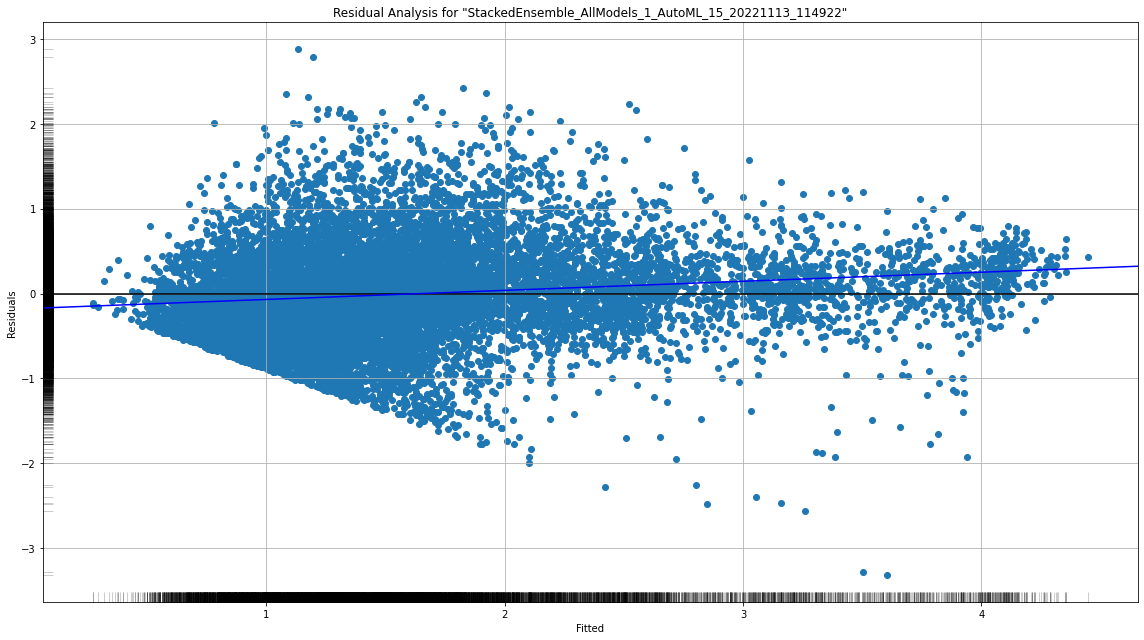

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

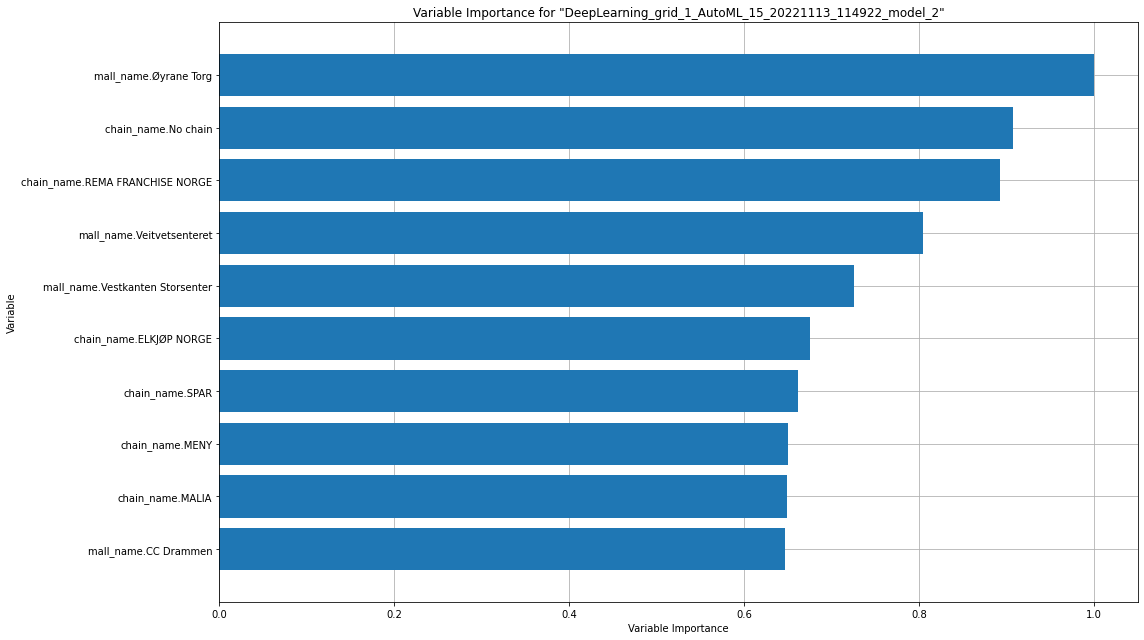

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

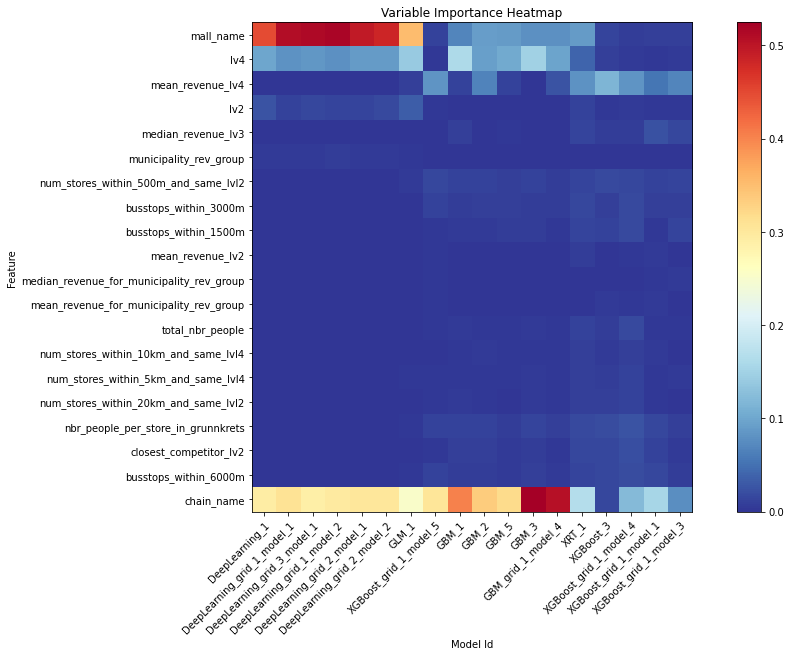

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

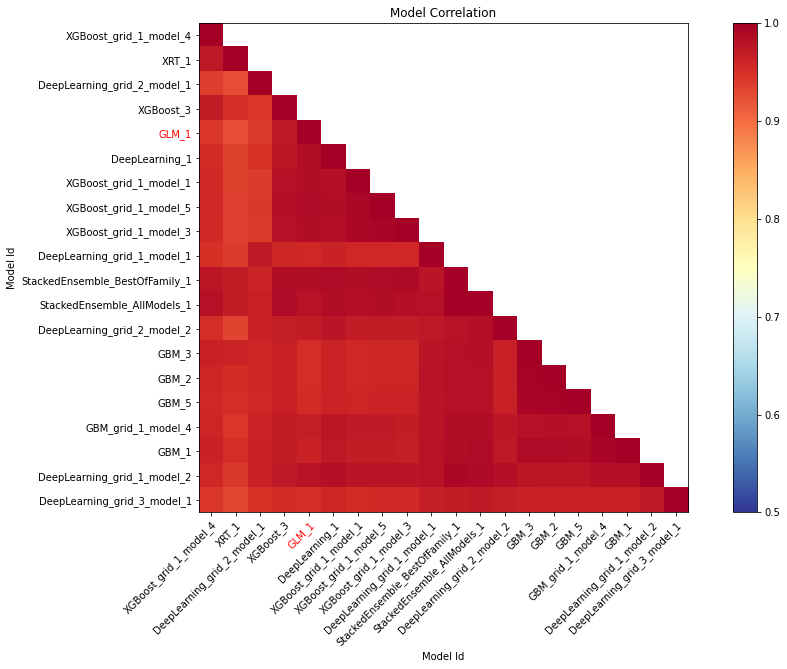

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

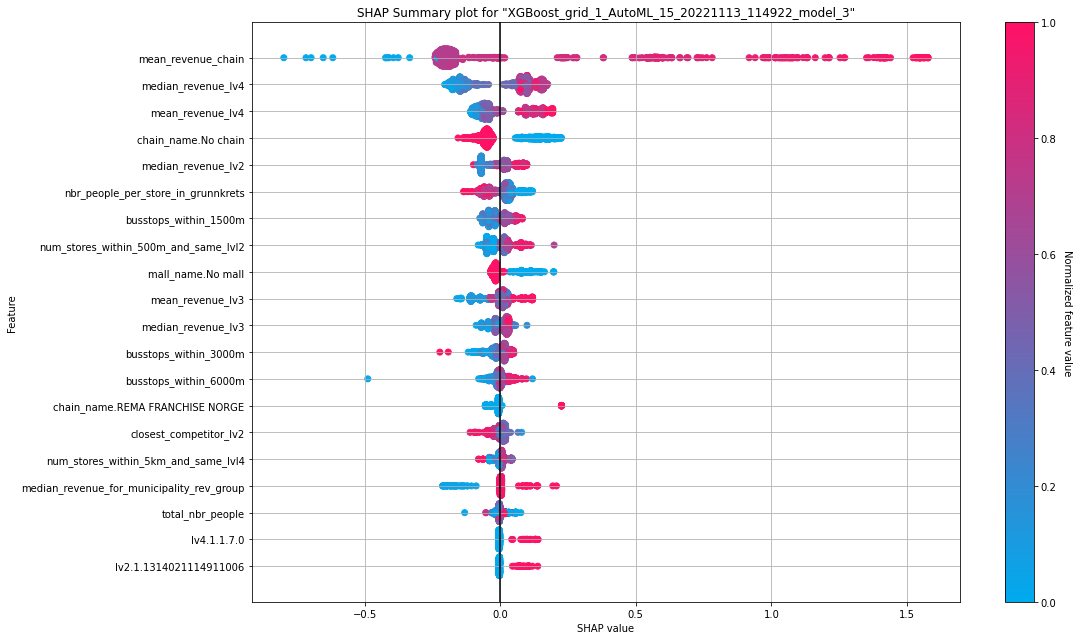

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

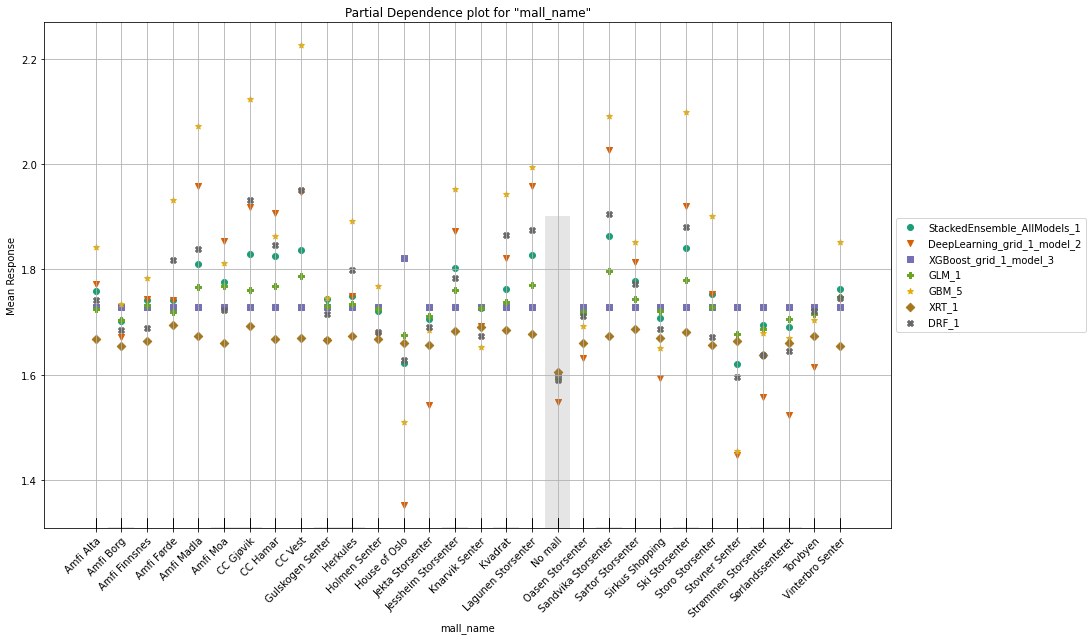

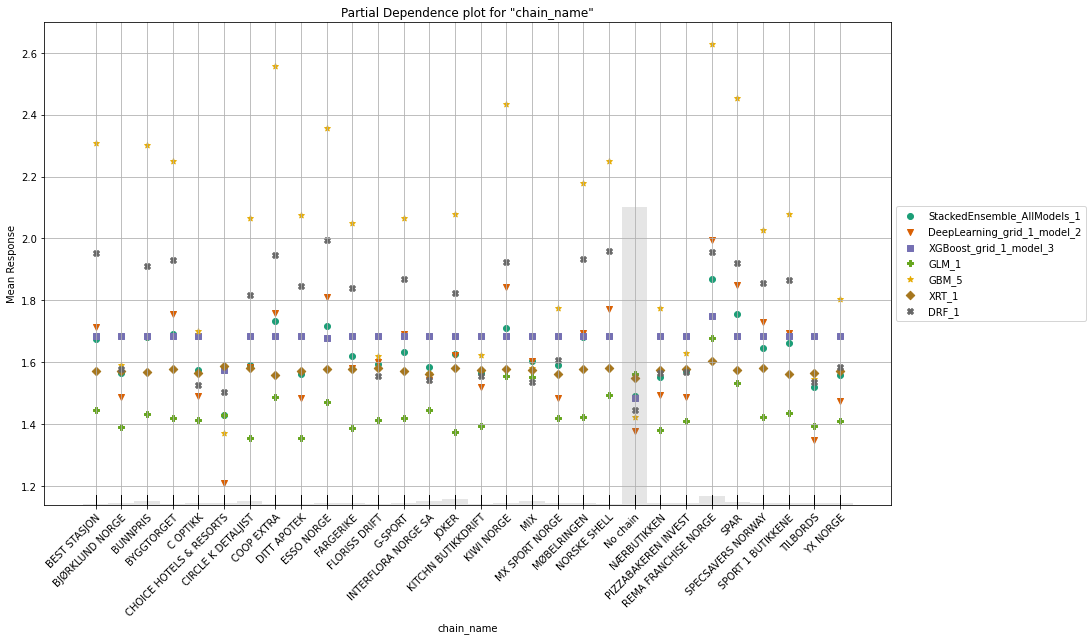

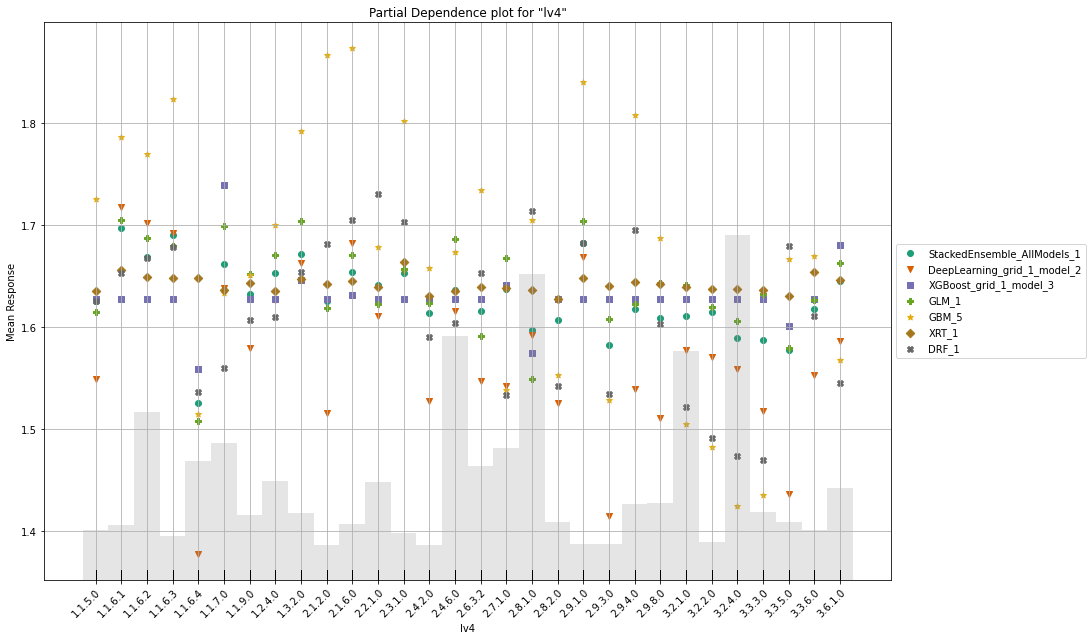

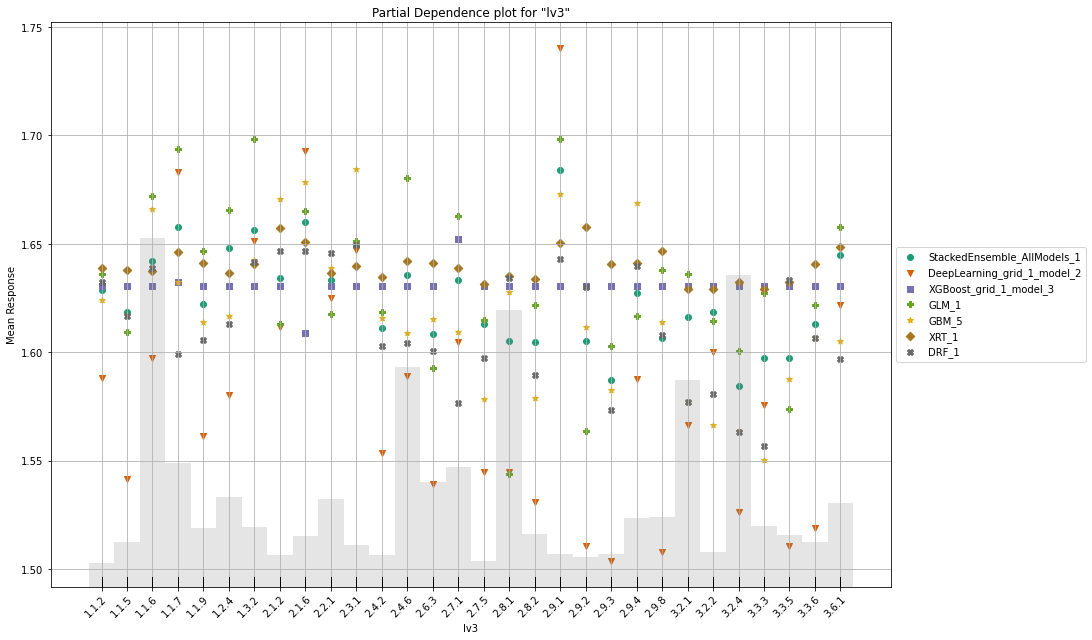

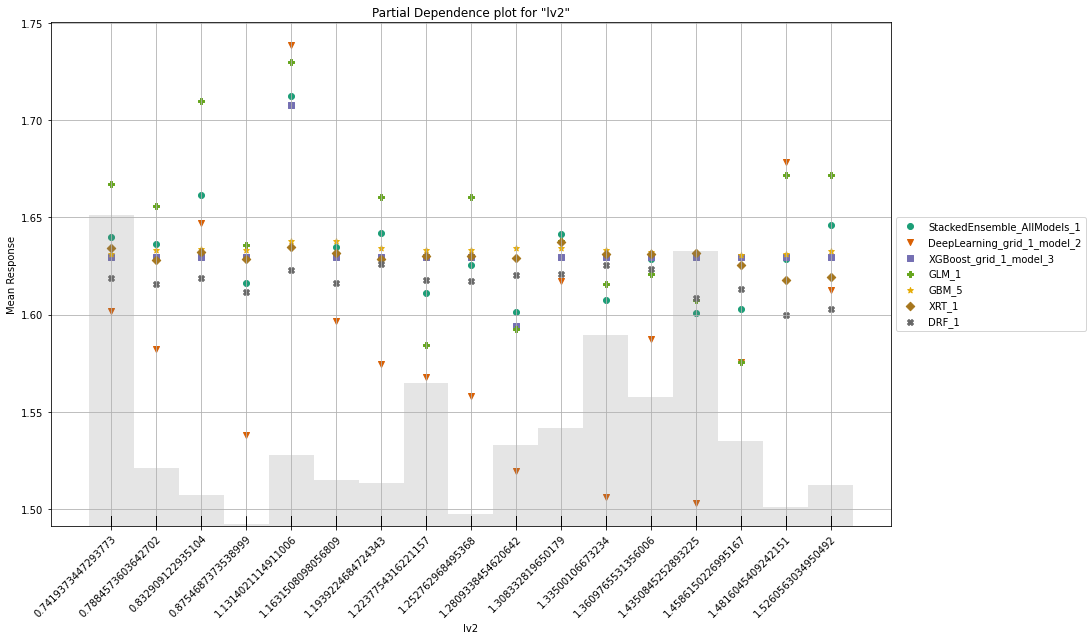

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

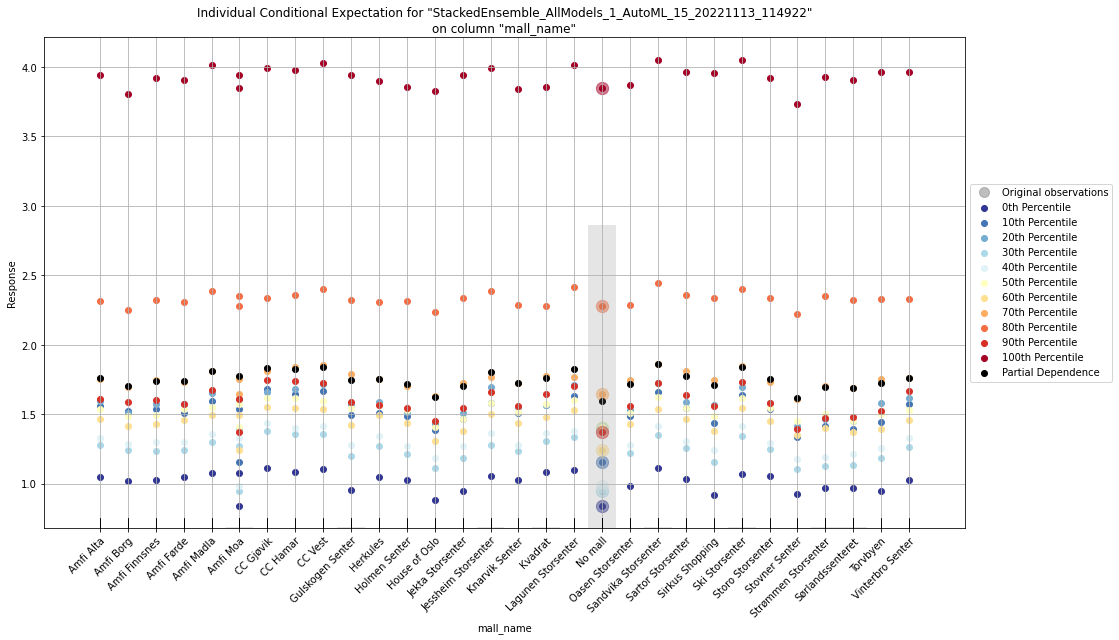

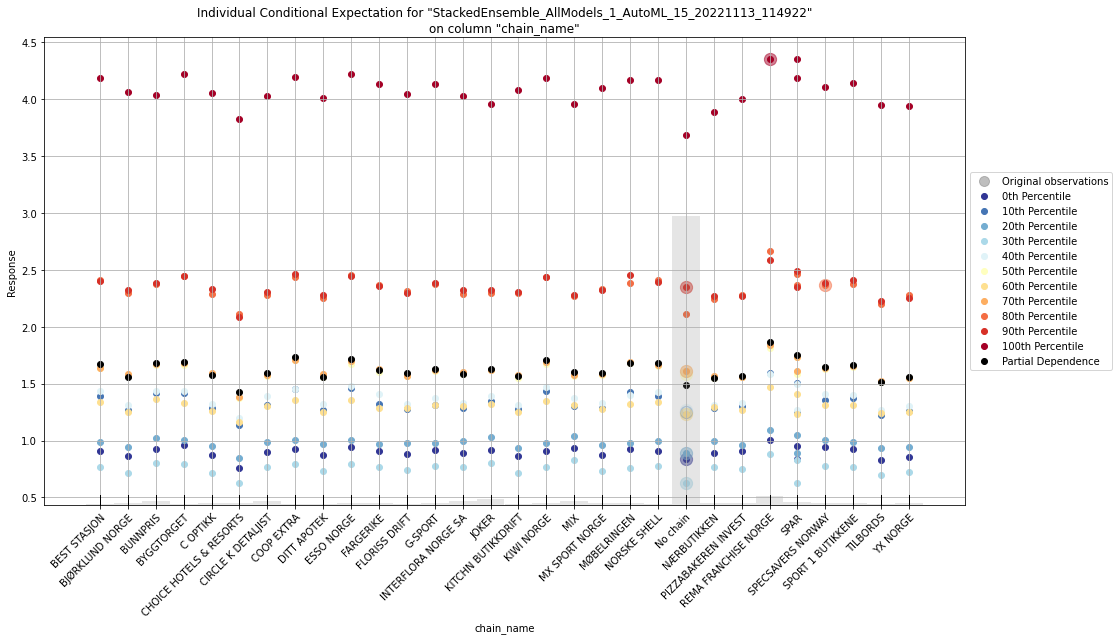

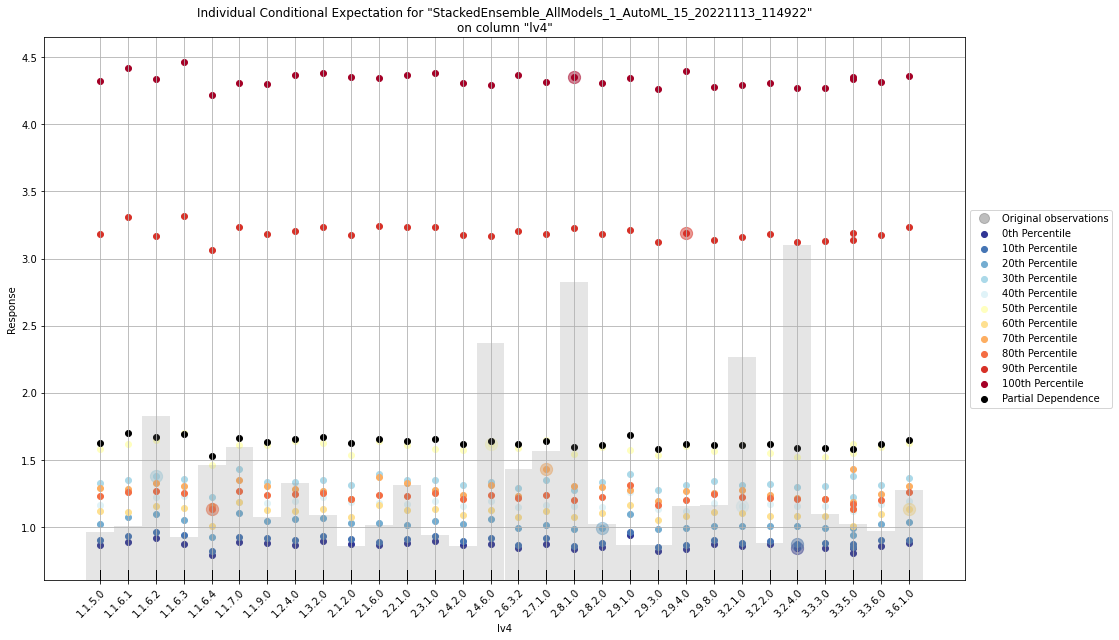

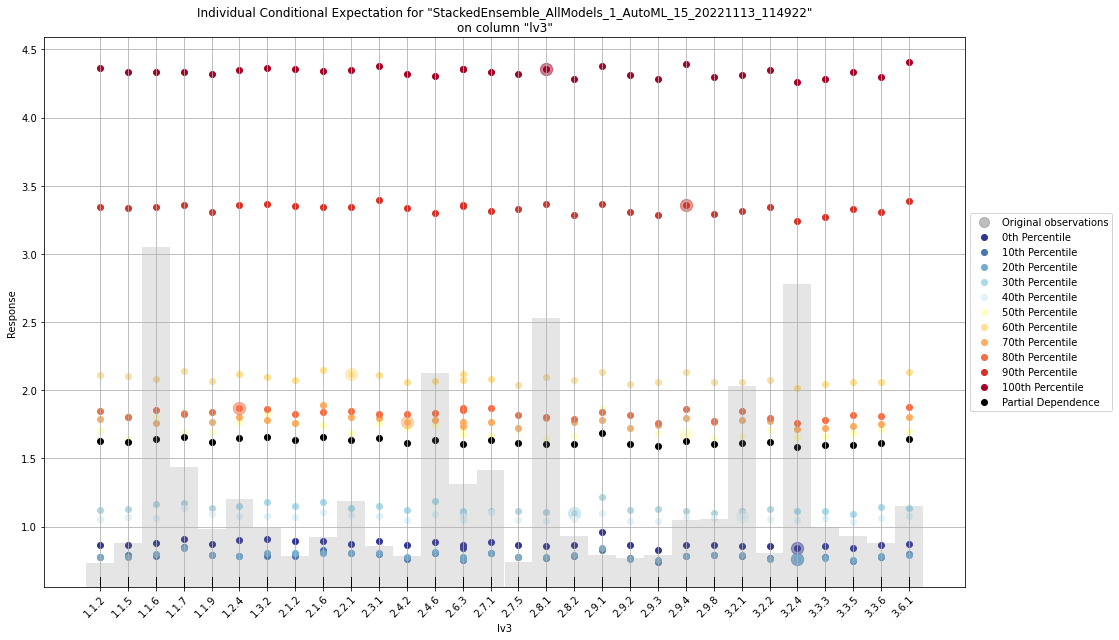

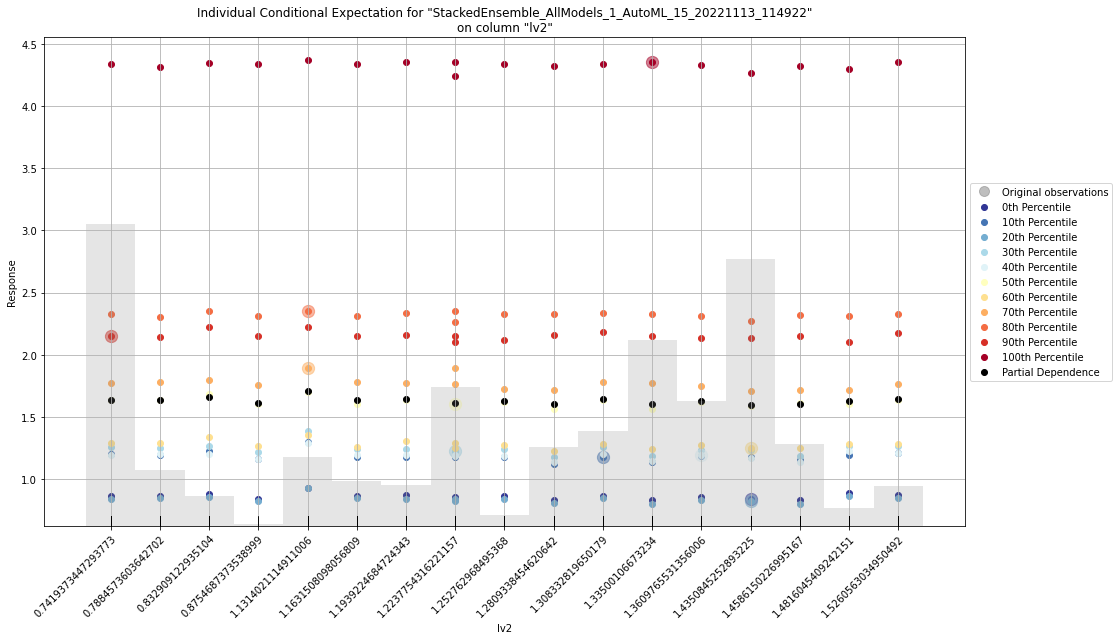

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_15_20221113_114922_model_6,0.301399,0.0908412,0.221479,0.135304,0.0908412,3949,0.00096,XGBoost
XGBoost_grid_1_AutoML_15_20221113_114922_model_2,0.320825,0.102929,0.240887,0.142599,0.102929,827,0.000888,XGBoost
DRF_1_AutoML_15_20221113_114922,0.325876,0.106195,0.246702,0.146849,0.106195,10198,0.005233,DRF
XGBoost_1_AutoML_15_20221113_114922,0.367694,0.135199,0.277701,0.162444,0.135199,811,0.001292,XGBoost
XGBoost_grid_1_AutoML_15_20221113_114922_model_7,0.385026,0.148245,0.290925,0.167976,0.148245,962,0.001042,XGBoost
XRT_1_AutoML_15_20221113_114922,0.435326,0.189509,0.330926,0.193251,0.189509,7758,0.005759,DRF
XGBoost_2_AutoML_15_20221113_114922,0.444446,0.197533,0.338004,0.194604,0.197533,492,0.000836,XGBoost
GBM_grid_1_AutoML_15_20221113_114922_model_3,0.472796,0.223537,0.35202,0.209319,0.223537,749,0.003761,GBM
GBM_grid_1_AutoML_15_20221113_114922_model_5,0.503108,0.253118,0.374354,0.220082,0.253118,765,0.002311,GBM
GBM_grid_1_AutoML_15_20221113_114922_model_1,0.506234,0.256273,0.377864,0.219819,0.256273,704,0.002661,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [155]:
aml.explain(frame = train_data)